# Linear Regression

In [1]:
import pandas as pd
import seaborn as sn
df= pd.read_csv('Admission_Prediction.csv')

In [2]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [3]:
df.drop(columns=['Serial No.'],inplace=True)

In [4]:
df.isnull().sum()

GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

<AxesSubplot:xlabel='GRE Score', ylabel='Count'>

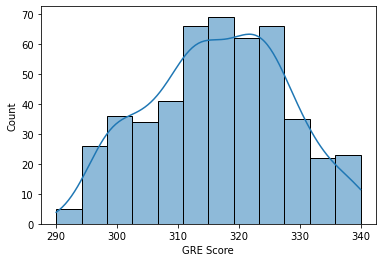

In [5]:
sn.histplot(df['GRE Score'],kde=True)

In [6]:
df['University Rating'].fillna(df['University Rating'].mode()[0],inplace=True)

In [7]:
df['GRE Score'].fillna(df['GRE Score'].mean(),inplace=True)

In [8]:
df['TOEFL Score'].fillna(df['TOEFL Score'].mean(),inplace=True)

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR'}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit'}>, <AxesSubplot:>]],
      dtype=object)

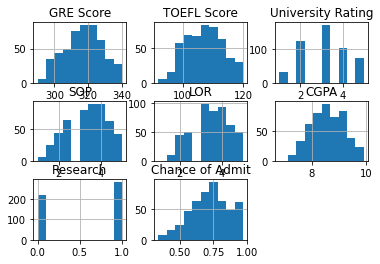

In [9]:
df.hist()

In [10]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


# CASE 1: without scaling the data (linear regression)

In [12]:
from sklearn.linear_model import LinearRegression,ridge_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
ind=df.columns[0:len(df.columns)-1]
dep=df.columns[-1]
x = df[ind]
y = df[dep]
X=x.values
Y=y.values
model=LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=355)
model.fit(x_train,y_train)
# model.coef_
df['predict']=model.predict(x.values)

In [13]:
model.score(x_train,y_train)

0.8415250484247909

In [14]:
model.score(x_test,y_test)

0.7534898831471064

In [15]:
len(x_train)

375

In [16]:
len(y_train)

375

In [17]:
len(x_test)

125

In [18]:
len(y_test)

125

In [19]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = model.score(x,y)
    n = x_train.shape[0]
    p = x_train.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [20]:
adj_r2(x_train,y_train)

0.8385023654247188

In [21]:
adj_r2(x_test,y_test)

0.7487880553052255

In [22]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,predict
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92,0.956552
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76,0.806160
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72,0.650073
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80,0.744834
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65,0.637029
...,...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87,0.840989
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96,0.995957
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93,0.945631
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73,0.704119


In [23]:
r2_score(df['Chance of Admit'],df['predict']) #500 rows are taken into consideration

0.8196118757837626

In [24]:
import pickle
with open('withoutscale','wb') as f:
    pickle.dump(model,f)

In [25]:
with open('withoutscale','rb') as f:
    ob=pickle.load(f)

In [26]:
ob.predict(x_train)

array([0.51961845, 0.92641531, 0.65268603, 0.45367794, 0.7261045 ,
       0.56157264, 0.64399746, 0.6717782 , 0.88462116, 0.5386425 ,
       0.86532148, 0.79615794, 0.87876975, 0.65391022, 0.82981008,
       0.83628496, 0.59987779, 0.67211946, 0.71566626, 0.62522037,
       0.58785288, 0.84607886, 0.91014103, 0.47815708, 0.7278715 ,
       0.65237293, 0.82712003, 0.6359292 , 0.72587529, 0.75234061,
       0.51252159, 0.94506612, 0.6755415 , 0.61353761, 0.69275363,
       0.63490871, 0.79588503, 0.79721814, 0.60981385, 0.70015986,
       0.80420222, 0.76643529, 0.67653552, 0.69393134, 0.57781969,
       0.85616644, 0.57673715, 0.69877244, 0.78172433, 0.55107767,
       0.69755156, 0.71843697, 0.53309299, 0.68272674, 0.71027383,
       0.64046325, 0.69857504, 0.53228787, 0.50208129, 0.89510618,
       0.56678189, 0.51766808, 0.81335433, 0.84772852, 0.70645241,
       0.59739162, 0.79918831, 0.6033345 , 0.59393044, 0.71228864,
       0.62009763, 0.74220017, 0.65059942, 0.54180481, 0.69289

In [27]:
model.coef_

array([0.00210724, 0.0018642 , 0.00382886, 0.00144171, 0.0160296 ,
       0.13047543, 0.01990266])

In [28]:
model.intercept_

-1.3464908093891017

# Lasso Regression on same Data

In [29]:
x_train

array([[303.        ,  98.        ,   1.        , ...,   2.5       ,
          7.65      ,   0.        ],
       [316.55876289, 119.        ,   5.        , ...,   4.5       ,
          9.7       ,   1.        ],
       [310.        , 106.        ,   4.        , ...,   2.5       ,
          8.36      ,   0.        ],
       ...,
       [304.        ,  97.        ,   2.        , ...,   2.        ,
          7.64      ,   0.        ],
       [339.        , 114.        ,   5.        , ...,   4.5       ,
          9.76      ,   1.        ],
       [321.        , 114.        ,   4.        , ...,   5.        ,
          9.12      ,   0.        ]])

In [30]:
y_train

array([0.56, 0.95, 0.57, 0.47, 0.72, 0.61, 0.73, 0.56, 0.92, 0.38, 0.87,
       0.77, 0.92, 0.62, 0.78, 0.84, 0.62, 0.69, 0.74, 0.72, 0.67, 0.85,
       0.91, 0.37, 0.71, 0.65, 0.84, 0.46, 0.67, 0.52, 0.44, 0.89, 0.61,
       0.49, 0.7 , 0.64, 0.61, 0.78, 0.67, 0.7 , 0.8 , 0.8 , 0.71, 0.74,
       0.55, 0.88, 0.44, 0.57, 0.78, 0.7 , 0.71, 0.74, 0.59, 0.63, 0.65,
       0.69, 0.7 , 0.69, 0.44, 0.9 , 0.57, 0.49, 0.82, 0.83, 0.78, 0.62,
       0.8 , 0.65, 0.71, 0.71, 0.65, 0.63, 0.6 , 0.53, 0.7 , 0.85, 0.64,
       0.78, 0.75, 0.76, 0.67, 0.79, 0.68, 0.71, 0.73, 0.66, 0.53, 0.66,
       0.62, 0.66, 0.73, 0.69, 0.5 , 0.6 , 0.76, 0.63, 0.92, 0.91, 0.51,
       0.71, 0.97, 0.86, 0.91, 0.93, 0.57, 0.73, 0.83, 0.84, 0.96, 0.74,
       0.94, 0.46, 0.62, 0.7 , 0.64, 0.73, 0.64, 0.84, 0.83, 0.58, 0.58,
       0.66, 0.64, 0.84, 0.81, 0.77, 0.53, 0.54, 0.58, 0.8 , 0.53, 0.63,
       0.94, 0.83, 0.72, 0.78, 0.58, 0.78, 0.76, 0.73, 0.57, 0.91, 0.88,
       0.96, 0.67, 0.59, 0.93, 0.62, 0.76, 0.82, 0.

In [35]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
from sklearn.linear_model import LinearRegression,LassoCV,ridge_regression,Lasso
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)
alpha=lasscv.alpha_
lasso_model=Lasso(alpha)
lasso_model.fit(x_train,y_train)

C:\Users\91986\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=3.0341655445178153e-05)

In [36]:
lasso_model.coef_ # coeffienct of linear reggression and lasso has slight changes

array([0.00211767, 0.0018738 , 0.00382945, 0.00144517, 0.01602948,
       0.13021159, 0.0197613 ])

In [37]:
lasso_model.intercept_ # intercept of linear regresion and lasso has slight changes

-1.3484913808232784

In [38]:
lasso_model.score(x_train,y_train)

0.8415244643048901

In [39]:
lasso_model.score(x_test,y_test)

0.753493404635983

In [40]:
adj_r2(x_train,y_train)

0.8385023654247188

In [41]:
adj_r2(x_test,y_test)

0.7487880553052255

# Ridge Regression on Same Data

In [42]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them
import numpy as np
from sklearn.linear_model import LinearRegression,LassoCV,Lasso,RidgeCV,Ridge
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)
alpha=ridgecv.alpha_
ridge_model = Ridge(alpha)
ridge_model.fit(x_train, y_train)

C:\Users\91986\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\91986\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\91986\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\91986\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\91986\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\91986\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\91986\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\91986\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

Ridge(alpha=0.05782946011746226)

In [45]:
ridge_model.coef_

array([0.00211223, 0.00187177, 0.00384236, 0.00146861, 0.01604438,
       0.13022359, 0.0198983 ])

In [46]:
ridge_model.intercept_

-1.3469045964431539

In [47]:
ridge_model.score(x_train,y_train)#r2 calculation for train data

0.8415247958967254

In [48]:
ridge_model.score(x_test,y_test) #r2 calculation for test data

0.7535613249371989

In [49]:
adj_r2(x_train,y_train)

0.8385023654247188

In [50]:
adj_r2(x_test,y_test)

0.7487880553052255

# CASE 2: without scaling the data

In [51]:
df.drop(columns='predict',inplace=True)

In [52]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


In [80]:
from sklearn.linear_model import LinearRegression,ridge_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
ind=df.columns[0:len(df.columns)-1]
dep=df.columns[-1]
x = df[ind]
y = df[dep]
X=x.values
Y=y.values
scale=StandardScaler()
scale_X=scale.fit_transform(X)
model=LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(scale_X,Y,test_size = 0.25,random_state=355)
model.fit(x_train,y_train)
transformed=scale.transform(x.values)
# model.coef_
model.predict(transformed)

array([0.95655226, 0.80616023, 0.65007334, 0.74483433, 0.63702902,
       0.87554604, 0.70286299, 0.5976811 , 0.55460481, 0.72219204,
       0.7325153 , 0.83690056, 0.82981008, 0.63267862, 0.64113122,
       0.65047683, 0.72145279, 0.65237293, 0.74220017, 0.65581446,
       0.60896757, 0.69857504, 0.92685189, 0.92641531, 0.96295894,
       0.96390748, 0.76515832, 0.51252159, 0.42671078, 0.48566015,
       0.6033345 , 0.7188105 , 0.92387808, 0.94398663, 0.96341774,
       0.85966612, 0.69171691, 0.53646092, 0.50061588, 0.57595507,
       0.6359292 , 0.65627586, 0.68481036, 0.8444729 , 0.8872468 ,
       0.82714574, 0.89769393, 0.94506612, 0.80628668, 0.74915879,
       0.68584035, 0.62357758, 0.70645241, 0.68295594, 0.65282188,
       0.58840058, 0.53752307, 0.51838375, 0.41758638, 0.62828468,
       0.60798962, 0.62395745, 0.63972461, 0.70721701, 0.75234061,
       0.78745912, 0.79588503, 0.73488476, 0.83034706, 0.86004672,
       0.92473738, 0.97017664, 0.89625642, 0.80183888, 0.76997

In [81]:
model.score(x_train,y_train)

0.8415250484247909

In [82]:
model.score(x_test,y_test)

0.7534898831471066

In [83]:
len(x_train)

375

In [84]:
len(x_train)

375

In [85]:
len(x_test)

125

In [86]:
len(y_test)

125

In [87]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = model.score(x,y)
    n = x_train.shape[0]
    p = x_train.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [88]:
adj_r2(x_train,y_train)

0.8385023654247188

In [89]:
adj_r2(x_test,y_test)

0.7487880553052259

In [90]:
with open('withscale','wb') as f:
    pickle.dump(model,f)

In [91]:
with open('withscale','rb') as f:
    ob=pickle.load(f)

In [92]:
ob.predict([[337.00000,118.0,4.0,4.5,4.5,9.65,1]])

array([10.79151268])

In [93]:
model.predict([[337.00000,118.0,4.0,4.5,4.5,9.65,1]])

array([10.79151268])

In [94]:
x_train

array([[-1.22229835e+00, -1.51982203e+00, -1.87788687e+00, ...,
        -1.06433187e+00, -1.53331383e+00, -1.12815215e+00],
       [ 5.12433309e-15,  1.95396044e+00,  1.66864169e+00, ...,
         1.09894429e+00,  1.85955927e+00,  8.86405260e-01],
       [-5.91260806e-01, -1.96476326e-01,  7.82009548e-01, ...,
        -1.06433187e+00, -3.58221197e-01, -1.12815215e+00],
       ...,
       [-1.13215013e+00, -1.68524024e+00, -9.91254733e-01, ...,
        -1.60515091e+00, -1.54986443e+00, -1.12815215e+00],
       [ 2.02303760e+00,  1.12686938e+00,  1.66864169e+00, ...,
         1.09894429e+00,  1.95886287e+00,  8.86405260e-01],
       [ 4.00369625e-01,  1.12686938e+00,  7.82009548e-01, ...,
         1.63976333e+00,  8.99624440e-01, -1.12815215e+00]])

In [95]:
y_train

array([0.56, 0.95, 0.57, 0.47, 0.72, 0.61, 0.73, 0.56, 0.92, 0.38, 0.87,
       0.77, 0.92, 0.62, 0.78, 0.84, 0.62, 0.69, 0.74, 0.72, 0.67, 0.85,
       0.91, 0.37, 0.71, 0.65, 0.84, 0.46, 0.67, 0.52, 0.44, 0.89, 0.61,
       0.49, 0.7 , 0.64, 0.61, 0.78, 0.67, 0.7 , 0.8 , 0.8 , 0.71, 0.74,
       0.55, 0.88, 0.44, 0.57, 0.78, 0.7 , 0.71, 0.74, 0.59, 0.63, 0.65,
       0.69, 0.7 , 0.69, 0.44, 0.9 , 0.57, 0.49, 0.82, 0.83, 0.78, 0.62,
       0.8 , 0.65, 0.71, 0.71, 0.65, 0.63, 0.6 , 0.53, 0.7 , 0.85, 0.64,
       0.78, 0.75, 0.76, 0.67, 0.79, 0.68, 0.71, 0.73, 0.66, 0.53, 0.66,
       0.62, 0.66, 0.73, 0.69, 0.5 , 0.6 , 0.76, 0.63, 0.92, 0.91, 0.51,
       0.71, 0.97, 0.86, 0.91, 0.93, 0.57, 0.73, 0.83, 0.84, 0.96, 0.74,
       0.94, 0.46, 0.62, 0.7 , 0.64, 0.73, 0.64, 0.84, 0.83, 0.58, 0.58,
       0.66, 0.64, 0.84, 0.81, 0.77, 0.53, 0.54, 0.58, 0.8 , 0.53, 0.63,
       0.94, 0.83, 0.72, 0.78, 0.58, 0.78, 0.76, 0.73, 0.57, 0.91, 0.88,
       0.96, 0.67, 0.59, 0.93, 0.62, 0.76, 0.82, 0.

In [102]:
x_test[0]

array([-1.94348412, -2.3469131 , -1.87788687, -1.3878618 , -1.60515091,
       -2.27809085, -1.12815215])

In [97]:
y_test

array([0.46, 0.82, 0.58, 0.84, 0.95, 0.68, 0.64, 0.57, 0.61, 0.42, 0.8 ,
       0.61, 0.73, 0.56, 0.79, 0.66, 0.73, 0.62, 0.52, 0.89, 0.73, 0.79,
       0.84, 0.58, 0.48, 0.71, 0.54, 0.79, 0.8 , 0.79, 0.67, 0.96, 0.93,
       0.45, 0.7 , 0.49, 0.89, 0.52, 0.68, 0.62, 0.54, 0.73, 0.77, 0.64,
       0.68, 0.72, 0.68, 0.76, 0.7 , 0.68, 0.72, 0.81, 0.71, 0.94, 0.61,
       0.82, 0.52, 0.86, 0.71, 0.57, 0.55, 0.57, 0.79, 0.64, 0.67, 0.95,
       0.47, 0.72, 0.89, 0.42, 0.92, 0.93, 0.68, 0.36, 0.65, 0.94, 0.54,
       0.89, 0.73, 0.72, 0.75, 0.77, 0.8 , 0.65, 0.94, 0.64, 0.78, 0.54,
       0.95, 0.74, 0.81, 0.96, 0.81, 0.48, 0.71, 0.86, 0.87, 0.9 , 0.91,
       0.78, 0.72, 0.73, 0.81, 0.72, 0.84, 0.65, 0.8 , 0.93, 0.85, 0.71,
       0.87, 0.79, 0.73, 0.87, 0.66, 0.76, 0.94, 0.87, 0.63, 0.76, 0.92,
       0.93, 0.56, 0.87, 0.76])

In [99]:
transformed=scale.transform(x.values)

In [101]:
model.predict(transformed)

array([0.95655226, 0.80616023, 0.65007334, 0.74483433, 0.63702902,
       0.87554604, 0.70286299, 0.5976811 , 0.55460481, 0.72219204,
       0.7325153 , 0.83690056, 0.82981008, 0.63267862, 0.64113122,
       0.65047683, 0.72145279, 0.65237293, 0.74220017, 0.65581446,
       0.60896757, 0.69857504, 0.92685189, 0.92641531, 0.96295894,
       0.96390748, 0.76515832, 0.51252159, 0.42671078, 0.48566015,
       0.6033345 , 0.7188105 , 0.92387808, 0.94398663, 0.96341774,
       0.85966612, 0.69171691, 0.53646092, 0.50061588, 0.57595507,
       0.6359292 , 0.65627586, 0.68481036, 0.8444729 , 0.8872468 ,
       0.82714574, 0.89769393, 0.94506612, 0.80628668, 0.74915879,
       0.68584035, 0.62357758, 0.70645241, 0.68295594, 0.65282188,
       0.58840058, 0.53752307, 0.51838375, 0.41758638, 0.62828468,
       0.60798962, 0.62395745, 0.63972461, 0.70721701, 0.75234061,
       0.78745912, 0.79588503, 0.73488476, 0.83034706, 0.86004672,
       0.92473738, 0.97017664, 0.89625642, 0.80183888, 0.76997

In [103]:
ls

 Volume in drive C has no label.
 Volume Serial Number is E6D7-2767

 Directory of C:\Users\91986

10-10-2022  09.27 PM    <DIR>          .
05-09-2022  03.35 PM    <DIR>          ..
09-09-2022  01.42 AM    <DIR>          .astropy
25-06-2022  06.00 PM    <DIR>          .azuredatastudio
13-09-2022  04.16 PM                10 .bash_history
13-09-2022  05.07 PM    <DIR>          .conda
25-06-2022  04.33 PM                25 .condarc
25-06-2022  04.32 PM    <DIR>          .continuum
28-09-2022  09.26 AM    <DIR>          .cufflinks
22-07-2022  01.28 PM                66 .gitconfig
09-09-2022  12.39 AM    <DIR>          .gnupg
10-10-2022  09.27 PM    <DIR>          .ipynb_checkpoints
25-06-2022  03.21 PM    <DIR>          .ipython
08-07-2022  04.48 PM    <DIR>          .jupyter
25-06-2022  03.23 PM    <DIR>          .matplotlib
25-06-2022  03.26 PM    <DIR>          .ms-ad
13-09-2022  05.35 PM                19 .python_history
26-06-2022  10.00 AM    <DIR>          .ssh
25-06-2022  05.26 PM 